In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('/home/siva/Downloads/py-master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data preprocessing

In [5]:
df['experience'].fillna('zero',inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [9]:
df['experience']=df['experience'].apply(lambda x:w2n.word_to_num(x))

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [45]:
df

array([[0.        , 0.5       , 0.75      , 0.14285714],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.45454545, 0.        , 0.25      , 0.42857143],
       [0.18181818, 1.        , 1.        , 0.57142857],
       [0.63636364, 0.75      , 0.        , 0.71428571],
       [0.27272727, 0.25      , 1.        , 0.48571429],
       [0.90909091, 0.5       , 0.25      , 0.77142857],
       [1.        , 0.25      , 0.5       , 1.        ]])

# EDA

In [47]:
df=pd.DataFrame(df,columns=['experience','test_score(out of 10)','interview_score(out of 10)','salary($)'])

In [48]:
X=df.drop('salary($)',axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0.000000,0.50,0.75
1,0.000000,0.50,0.00
2,0.454545,0.00,0.25
3,0.181818,1.00,1.00
4,0.636364,0.75,0.00
5,0.272727,0.25,1.00
6,0.909091,0.50,0.25
7,1.000000,0.25,0.50


In [49]:
y=df['salary($)']
y

0    0.142857
1    0.000000
2    0.428571
3    0.571429
4    0.714286
5    0.485714
6    0.771429
7    1.000000
Name: salary($), dtype: float64

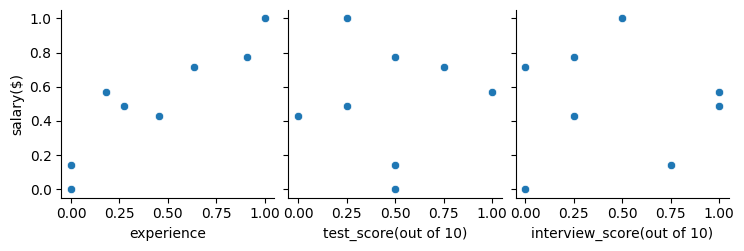

In [50]:
sns.pairplot(x_vars=X.columns.values,y_vars=['salary($)'],data=df,kind='scatter')

In [51]:
model=LinearRegression()
model.fit(X,y)


LinearRegression()

In [52]:
model.score(X,y)

0.9616780002577959